The following is for plotting 90 and 95 confidence interval

/var/folders/cw/2qdlb41d0r73pf4cnv0w41mh0000gn/T/ipykernel_52102/2627327576.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(pt_file)
/Users/lukas./anac

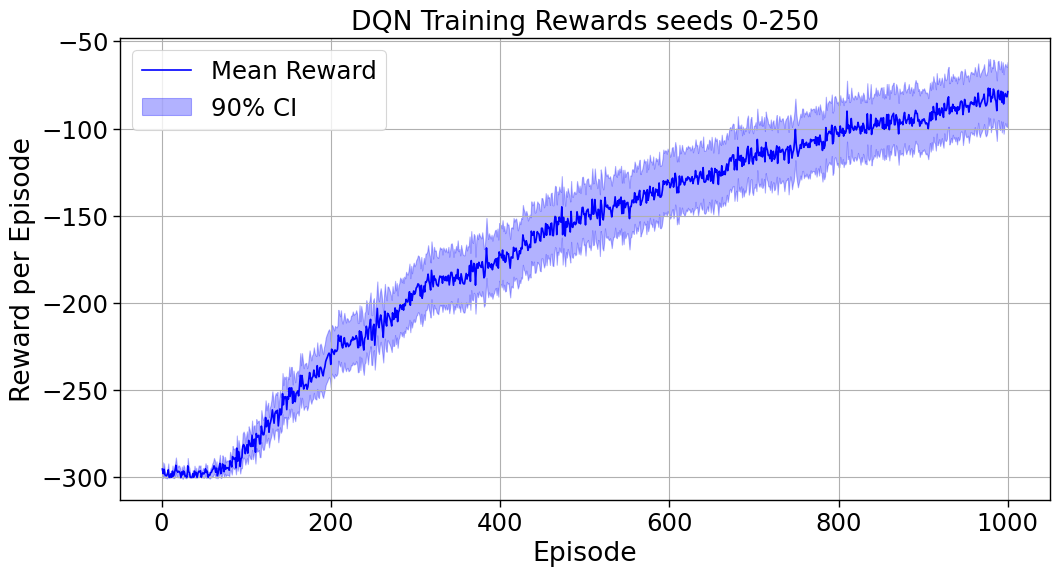

/Users/lukas./anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lukas./anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


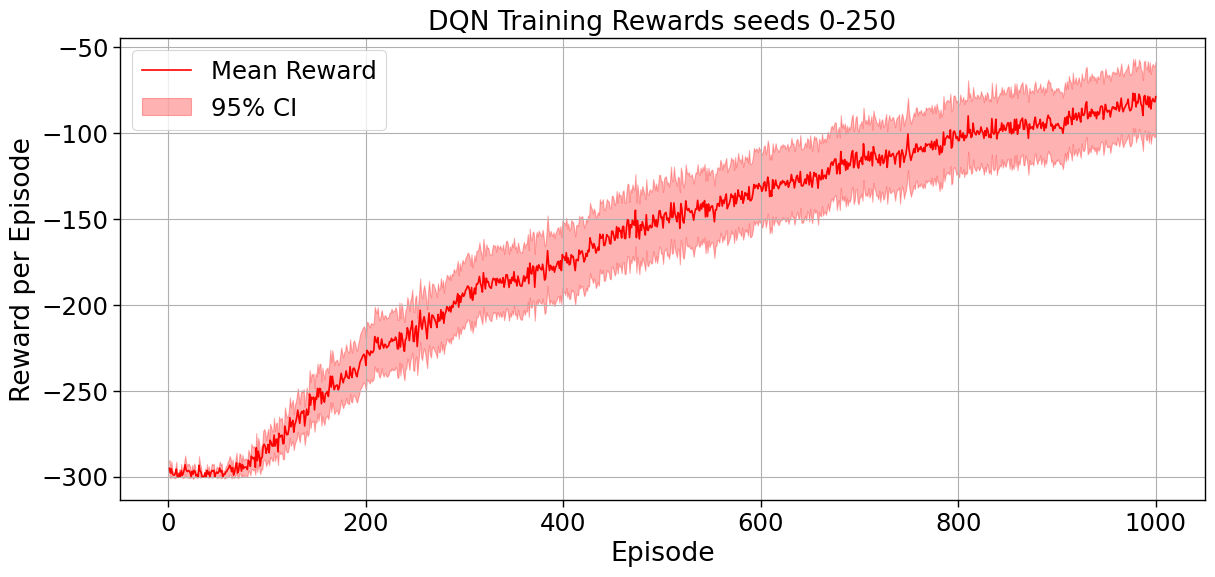

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved rewards
pt_file = "/Users/lukas./Desktop/CMPUT655-Project/CC_DQN/dqn_reward_seeds.pt"
data = torch.load(pt_file)
all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)

# Ensure 2D shape
if all_rewards.ndim == 1:
    all_rewards = all_rewards.reshape(1, -1)

num_seeds, num_episodes = all_rewards.shape

# Compute mean and std across seeds
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

episodes = np.arange(1, num_episodes + 1)

# 90% confidence interval
ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(12,6))
sns.set_context("paper", font_scale=2)
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                 alpha=0.3, color="blue", label="90% CI")
plt.title("DQN Training Rewards seeds 0-250")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode")
plt.grid(True)
plt.legend()
plt.show()

# 95% confidence interval
ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(14,6))
sns.set_context("paper", font_scale=2)
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                 alpha=0.3, color="red", label="95% CI")
plt.title("DQN Training Rewards seeds 0-250")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode")
plt.grid(True)
plt.legend()
plt.show()


The following is for statistical testing of Cohen’s d and wilcoxon sign ranked. I changed tests because we essentially have paired data were we are comparing seed vs seed. I did average reward of seed vs average reward of other seed

In [1]:
import torch
import numpy as np
from scipy.stats import wilcoxon

def cohen_d_paired(x, y):
    x = np.array(x)
    y = np.array(y)
    assert x.shape == y.shape, "x and y must have the same shape"
    diff = x - y
    return diff.mean() / diff.std(ddof=1)


file1 = "/Users/lukas./Desktop/CMPUT655-Project/CC_DQN/dqn_reward_seeds.pt"
file2 = "/Users/lukas./Desktop/CMPUT655-Project/CC_DQN/dqn_reward_seeds.pt"


rewards1 = np.array(torch.load(file1)['rewards']) 
rewards2 = np.array(torch.load(file2)['rewards'])


rewards1_per_seed = rewards1.mean(axis=1)
rewards2_per_seed = rewards2.mean(axis=1) # mean of each seed 
stat, p_value = wilcoxon(rewards1_per_seed, rewards2_per_seed)
print(f"Wilcoxon signed-rank test: stat={stat}, p={p_value}")

d = cohen_d_paired(rewards1_per_seed, rewards2_per_seed)
print(f"Cohen's d (paired): {d:.3f}")


rewards1 = np.array(torch.load(file1)['rewards']) 
rewards2 = np.array(torch.load(file2)['rewards'])

# Aggregate per seed (total or mean reward across episodes)
rewards1_per_seed = rewards1.mean(axis=1)
rewards2_per_seed = rewards2.mean(axis=1)


stat, p_value = wilcoxon(rewards1_per_seed, rewards2_per_seed)
print(f"Wilcoxon signed-rank test: stat={stat}, p={p_value}")



/var/folders/cw/2qdlb41d0r73pf4cnv0w41mh0000gn/T/ipykernel_46234/2753292226.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rewards1 = np.array(torch.load(file1)['rewar

ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [2]:
# for testing data vs random 
import torch
import numpy as np
from scipy.stats import wilcoxon

def cohen_d_paired(x, y):
    """
    Compute Cohen's d for paired samples.
    """
    x = np.array(x)
    y = np.array(y)
    assert x.shape == y.shape, "x and y must have the same shape"
    diff = x - y
    return diff.mean() / diff.std(ddof=1)

# Load your real rewards
file_real = "/Users/lukas./Desktop/CMPUT655-Project/CC_DQN/dqn_reward_seeds.pt"
rewards_real = np.array(torch.load(file_real)['rewards'])  # shape: (num_seeds, num_episodes)

num_seeds, num_episodes = rewards_real.shape

# Generate random baseline rewards (same shape)
# Here we assume rewards are roughly in the same range as your real data
min_reward, max_reward = rewards_real.min(), rewards_real.max()
rewards_random = np.random.uniform(low=min_reward, high=max_reward, size=(num_seeds, num_episodes))

# Flatten for paired tests (each seed x episode is paired)
rewards_real_flat = rewards_real.flatten()
rewards_random_flat = rewards_random.flatten()

# Wilcoxon signed-rank test
stat, p_value = wilcoxon(rewards_real_flat, rewards_random_flat)
print(f"Wilcoxon signed-rank test vs random: stat={stat}, p={p_value:.6f}")

# Paired Cohen's d
d = cohen_d_paired(rewards_real_flat, rewards_random_flat)
print(f"Cohen's d vs random (paired): {d:.3f}")


Wilcoxon signed-rank test vs random: stat=11075784020.0, p=0.000000
Cohen's d vs random (paired): -0.259


/var/folders/cw/2qdlb41d0r73pf4cnv0w41mh0000gn/T/ipykernel_46234/1100209556.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rewards_real = np.array(torch.load(file_real